# Landscape

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

i=50	c=[2.42610352e-02 2.66360336e-14 9.61322738e-04]	c_i=0.0252223579197005	c_i//2-c_i=-0.00027345519234973567
i=100	c=[2.43007324e-02 5.02975071e-14 1.11468796e-03]	c_i=0.025415420332969237	c_i//2-c_i=-0.0013798925577119293
i=150	c=[2.40097017e-02 3.92696372e-16 3.98250278e-07]	c_i=0.024010099947364718	c_i//2-c_i=2.2488788572229412e-06
i=200	c=[1.41136586e-02 1.47658674e-14 1.73816696e-04]	c_i=0.014287475332102414	c_i//2-c_i=0.00986065400105597
i=250	c=[1.07883318e-04 5.89103734e-15 6.13223209e-04]	c_i=0.0007211065272509322	c_i//2-c_i=0.02328898397306425
i=300	c=[7.70673289e-05 4.11797593e-14 8.12275664e-05]	c_i=0.00015829489534168844	c_i//2-c_i=0.023851778228855994
i=350	c=[4.73805337e-03 3.83321256e-14 5.05613747e-05]	c_i=0.00478861474626036	c_i//2-c_i=0.019183299543614505
i=400	c=[3.04593703e-08 1.46614085e-14 1.56396962e-06]	c_i=1.5944290012710916e-06	c_i//2-c_i=0.011432206150757756
i=450	c=[2.15941489e-08 5.71714934e-14 5.38584142e-08]	c_i=7.545262021862129e-08	c_i//2-c_i=0.0108

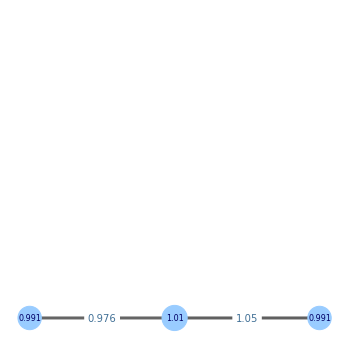

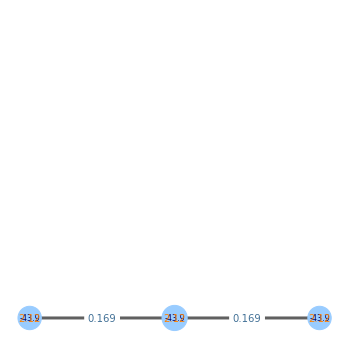

In [4]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
eqtarget = 'uvt'
G.eq_label = eqtarget
__, __, info = G.equalzie(eqtarget, callback=True)
G.draw_graph('adjust')
G.draw_graph()
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


### All 3 terms

Targeted

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, True, True
fix_u, fix_t, fix_v = True, True, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c


Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)


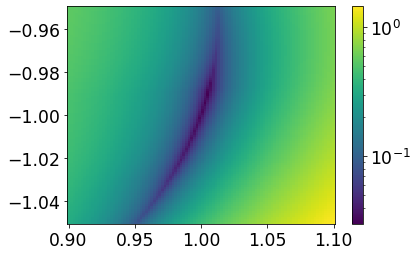

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Not targeted

In [2]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, True, True
fix_u, fix_t, fix_v = False, False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)


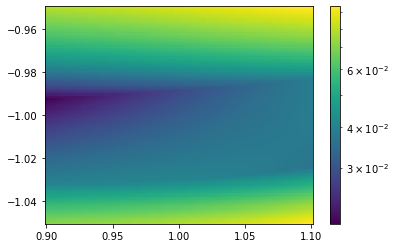

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $V$ and $t$

Targeted

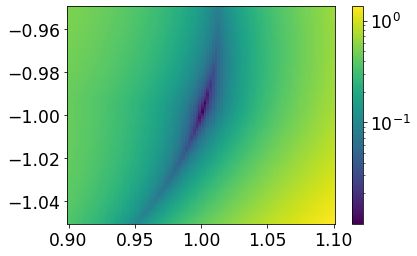

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, True
fix_u, fix_t, fix_v = False, True, True

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Not targeted

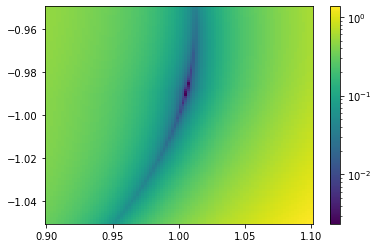

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, True
fix_u, fix_t, fix_v = False, False, True

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$ and $t$

Not targeted

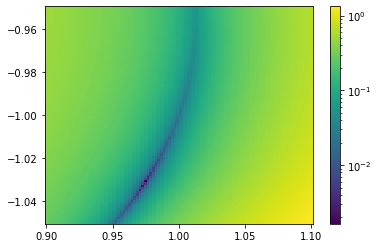

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, True, False
fix_u, fix_t, fix_v = False, True, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$ and $V$

Not targeted

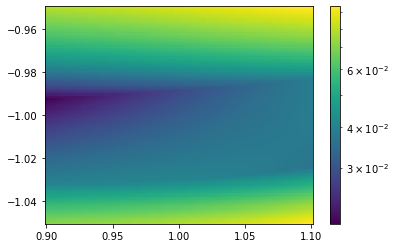

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, True
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $V$

Not targeted

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, True
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

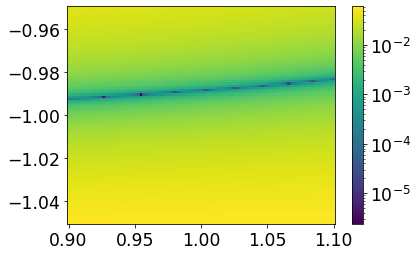

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Targeted

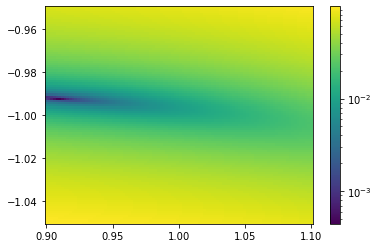

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, False, True
fix_u, fix_v = False, True

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$

Not targeted

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, False
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

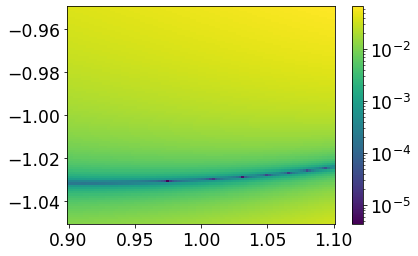

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Targeted

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, False
fix_u, fix_v = True, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

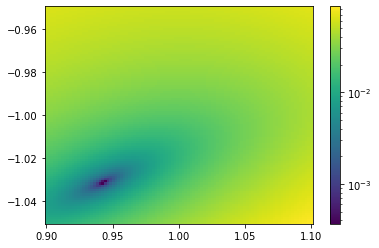

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $t$

In [24]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, False
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None

if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, __, __ = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks = None, None, None
nntx, nnty = None, None

if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c


Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)


plt.pcolormesh(X, Y, Z, norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 432x288 with 2 Axes>

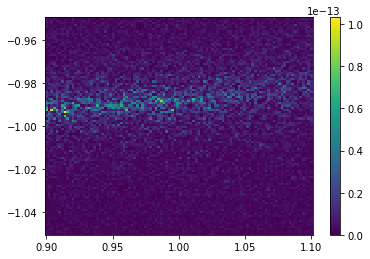

In [34]:
plt.pcolormesh(X, Y, Z, norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

## Cuts